## 1. Udforskning af datasættet

Opgave: 1. Udforsk datasættene på forskellige måder (indlæs data, udskriv noget data, tjek datas dimensioner / størrelse osv. osv.).

### Beskrivelse
Vi har taget udgangspunkt i Breast Cancer datasættet og vil kort udforske den på forskellige måder.

#### Hvad har vi gjort?
- Indlæst datasættet
- Udforsket på forskellige måder. Fx. se Top 5 med head, rækker, kolonner osv.
- Sat det i et DataFrame for at visualisere det i en tabel.


In [3]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_breast_cancer

# Indlæs datasættet
data = load_breast_cancer()

#Feature/target fordeling
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


# Første 5 Rækker
print(" Første fem rækker i datasættet:")
display(X.head())

# Dimensioner
print(" Datasættets dimensioner:")
print(f"Antal rækker (samples): {X.shape[0]}")
print(f"Antal kolonner (features): {X.shape[1]}")

#  statistik
print("Statistik:")
display(X.describe())

# Feature-navne 
print(" Feature-navne:")
display(pd.DataFrame(data.feature_names, columns=['Feature Navn']))

# Klassenavne i target 
print(" Klassenavne i target:")
print(data.target_names)

# Fordeling af klasser (tabel)
print(" Fordeling af klasser i target")
class_dist = y.replace({0: 'malignant', 1: 'benign'}).value_counts().reset_index()
class_dist.columns = ['Diagnose', 'Antal']
display(class_dist)


 Første fem rækker i datasættet:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Datasættets dimensioner:
Antal rækker (samples): 569
Antal kolonner (features): 30
Statistik:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


 Feature-navne:


,Feature Navn
0,mean radius
1,mean texture
2,mean perimeter
3,mean area
4,mean smoothness
5,mean compactness
6,mean concavity
7,mean concave points
8,mean symmetry
9,mean fractal dimension


 Klassenavne i target:
['malignant' 'benign']
 Fordeling af klasser i target


,Diagnose,Antal
0,benign,357
1,malignant,212


## 2. Indlæs og vis datasættet
**Formål**: 
- Se hele datasættet ( i notebooks output)


In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3. Linear Regression på 15 rækker

Formål
Formålet med dette eksperiment er at teste en simpel lineær regressionsmodel på et meget lille datasæt (15 rækker). I stedet for at forudsige en ydre variabel, prøver vi at forudsige værdien af den første feature, "mean radius", baseret på de resterende features.

Det er en kunstig opgave, men den illustrerer hvordan en model nemt kan overtilpasse, når datamængden er meget lille i forhold til antallet af features.

In [6]:
# ========== Code Cell for Step 3 ==========

from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import display

# 1. Brug de første 15 rækker og alle 30 features som input (X)
X = data.data[:15, :]        # Input data (inkl. "mean radius")
y = data.data[:15, 0]        # Target: "mean radius"

# 2. Opret og træn modellen
lin_model = LinearRegression()
lin_model.fit(X, y)

# 3. Gem koefficienter og feature-navne i en tabel
coeff_table = pd.DataFrame({
    'Feature': data.feature_names,
    'Koefficient': lin_model.coef_
})

# 4. Vis tabel og intercept
print(" Lineær regression koefficienter for de første 15 rækker:")
display(coeff_table)

print(f" Intercept: {lin_model.intercept_:.4f}")


 Lineær regression koefficienter for de første 15 rækker:


,Feature,Koefficient
0,mean radius,0.796495
1,mean texture,0.009178
2,mean perimeter,0.016141
3,mean area,0.000715
4,mean smoothness,-0.110815
5,mean compactness,-0.176913
6,mean concavity,-0.131023
7,mean concave points,-0.087777
8,mean symmetry,-0.123093
9,mean fractal dimension,-0.046270


 Intercept: 0.6032


## 4. Eksperimenter med `test_size` og `random_state`

**Formål**:

Når man udvikler en maskinlæringsmodel, er det vigtigt at opdele data i et træningssæt og et test-sæt. Ved at eksperimentere med forskellige værdier af test_size og random_state kan man få en fornemmelse for, hvordan datafordelingen og modelpræcision kan påvirkes.

Denne øvelse viser, hvordan train_test_split() fra sklearn bruges med forskellige parametre. Vi bruger hele datasættet og starter med at afprøve:

test_size = 0.4 (40 % af data til test)

random_state = 1 (for at sikre gentagelighed)


In [7]:
# ========== Code Cell for Step 4 ==========

from sklearn.model_selection import train_test_split
import pandas as pd
from IPython.display import display

# Brug hele datasættet
X = data.data
y = data.target

# Opdel med test_size = 0.4 og random_state = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Opret en lille tabel med shapes
split_table = pd.DataFrame({
    'Datasæt': ['X_train', 'X_test', 'y_train', 'y_test'],
    'Form (shape)': [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
})

print(" Opdeling af datasæt (test_size=0.4, random_state=1):")
display(split_table)



 Opdeling af datasæt (test_size=0.4, random_state=1):


,Datasæt,Form (shape)
0,X_train,"(341, 30)"
1,X_test,"(228, 30)"
2,y_train,"(341,)"
3,y_test,"(228,)"


## 5. Logistic Regression

**Formål**:

I denne øvelse træner vi en Logistic Regression-model til at klassificere tumorer som enten benigne (godartede) eller maligne (ondartede). Modellen trænes på alle datasættets rækker og evalueres med accuracy score.

Vi eksperimenterer med forskellige værdier for:

max_iter (iterationsgrænse for at sikre konvergens)

test_size (opdeling af data)

random_state (kontrollerbar tilfældighed)

Under de første eksperimenter opstod en ConvergenceWarning, fordi datasættet indeholder features med meget forskellig skala. Derfor anvender vi nu StandardScaler til at standardisere inputdata, hvilket sikrer bedre konvergens og mere stabile resultater.

In [8]:
# ========== Code Cell for Step 5 (med StandardScaler) ==========

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from IPython.display import display

# Skalér data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

# Liste af forskellige parameterkombinationer
configs = [
    {"test_size": 0.2, "random_state": 1, "max_iter": 1000},
    {"test_size": 0.3, "random_state": 42, "max_iter": 2000},
    {"test_size": 0.4, "random_state": 7, "max_iter": 10000}
]

results = []

# Eksperimentér med hver konfiguration
for cfg in configs:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, data.target, 
        test_size=cfg["test_size"], 
        random_state=cfg["random_state"]
    )
    
    model = LogisticRegression(max_iter=cfg["max_iter"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "test_size": cfg["test_size"],
        "random_state": cfg["random_state"],
        "max_iter": cfg["max_iter"],
        "accuracy": round(accuracy, 4)
    })

# Resultater i tabel
results_df = pd.DataFrame(results)
print(" Resultater for Logistic Regression med skalerede data og forskellige parametre:")
display(results_df)



 Resultater for Logistic Regression med skalerede data og forskellige parametre:


,test_size,random_state,max_iter,accuracy
0,0.2,1,1000,0.9825
1,0.3,42,2000,0.9825
2,0.4,7,10000,0.9737


-----------------------------------------------------------------------------------------------------------------------------------------------------


## 6. Evaluering af modellen og dårlige hyperparametre

**Formål**:  
Evaluere modellens præstation med `accuracy_score` og eksperimentere med forskellige dårlige kombinationer af parametre, fx lav `max_iter`, uheldige `random_state` og høj `test_size`. Formålet er at se, hvordan præcisionen falder under dårlige forhold.

**Observation**:  
Modellen opnår markant lavere accuracy, når den ikke får nok iterationer eller trænes på for lidt data. Dette viser vigtigheden af både datamængde og korrekt parameter-tuning i praksis.

Under afprøvning af lavere `max_iter` opstod `ConvergenceWarning`, da modellen ikke fik nok iterationer til at konvergere. Dette bekræfter, at for lave værdier af `max_iter` ikke bør anvendes, selvom accuracy umiddelbart kan virke høj. Bag kulisserne er modellen ustabil og dårligere trænet.




In [9]:
# ========== Code Cell for Step 6 ==========

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.9736842105263158


## 7. Confusion Matrix "Analyse af fejl med Confusion Matrix"

**Formål**:
At evaluere hvilke typer fejl modellen laver (falske positiver, falske negativer), og hvordan disse ændrer sig, når vi justerer hyperparametrene max_iter, test_size og random_state.

Dette giver bedre forståelse end blot accuracy, fordi det viser hvordan modellen fejler – ikke kun hvor ofte.

In [10]:
# ========== Code Cell for Step 7 ==========

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[ 67   6]
 [  0 155]]


## 8. Visualiser Confusion Matrix med Heatmap

**Formål**:
# Vi bruger seaborn til at lave en visuel repræsentation af vores confusion matrix.
# Det gør det lettere at aflæse hvor mange sande positive, sande negative,
# falske positive og falske negative modellen har lavet.
# Heatmappet vises i 9:16-format som ønsket til præsentation.

C:\Users\nour\AppData\Local\Temp\ipykernel_16340\3531895265.py:35: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\nour\PitFinderProjekt\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


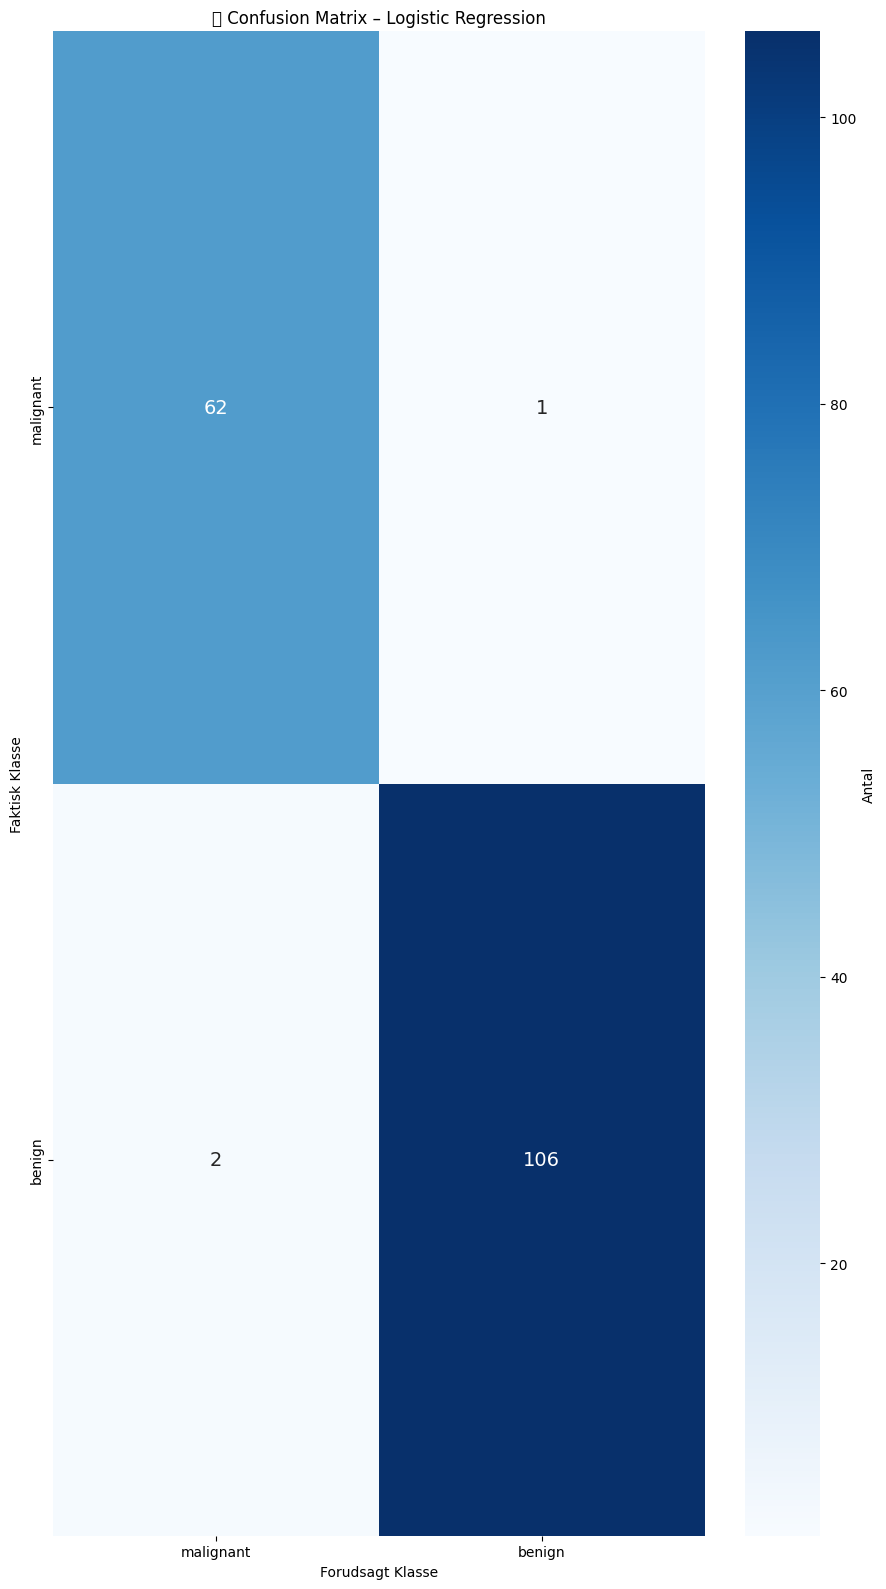

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1 Skaler data som tidligere
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

# 2 Split data (vælg fx test_size=0.3 og random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, data.target, test_size=0.3, random_state=42
)

# 3 Træn modellen
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4 Forudsig og lav confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 5 Visualisér confusion matrix som heatmap
plt.figure(figsize=(9, 16))  # 9:16 aspekt
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names,
            cbar_kws={"label": "Antal"},
            annot_kws={"size": 14})
plt.title("🔍 Confusion Matrix – Logistic Regression")
plt.xlabel("Forudsagt Klasse")
plt.ylabel("Faktisk Klasse")
plt.tight_layout()
plt.show()


Hvad viser grafen: Confusion matrixen giver et detaljeret billede af, hvordan modellen klassificerer de to mulige udfald: benign (godartet) og malignant (ondartet).

Vi aflæser matrixen således:

Øverste venstre hjørne (True Negatives): Antal ondartede tumorer korrekt klassificeret som "malignant".

Nederste højre hjørne (True Positives): Antal godartede tumorer korrekt klassificeret som "benign".

Øverste højre hjørne (False Positives): Antal godartede tumorer fejlagtigt klassificeret som "malignant".

Nederste venstre hjørne (False Negatives): Antal ondartede tumorer fejlagtigt klassificeret som "benign".



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 9. DecisionTreeClassifier

**Formål**:
Vi træner en beslutningstræ-model til at klassificere tumorer som enten benigne eller maligne. Formålet er at sammenligne præcisionen (accuracy) med den tidligere logistiske regression og samtidig eksperimentere med parameteren max_depth, som bestemmer hvor komplekst træet må være.

In [12]:
# ========== Code Cell for Step 9 ==========

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1 Opret og træn beslutningstræ-model med max_depth = 4
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)

# 2 Forudsig med modellen
dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))



Decision Tree Accuracy: 0.9590643274853801


## 10. Visualiser Beslutningstræet

**Formål**:
- Se det trænede træ's struktur.
- Her anvender vi `plot_tree` fra sklearn.


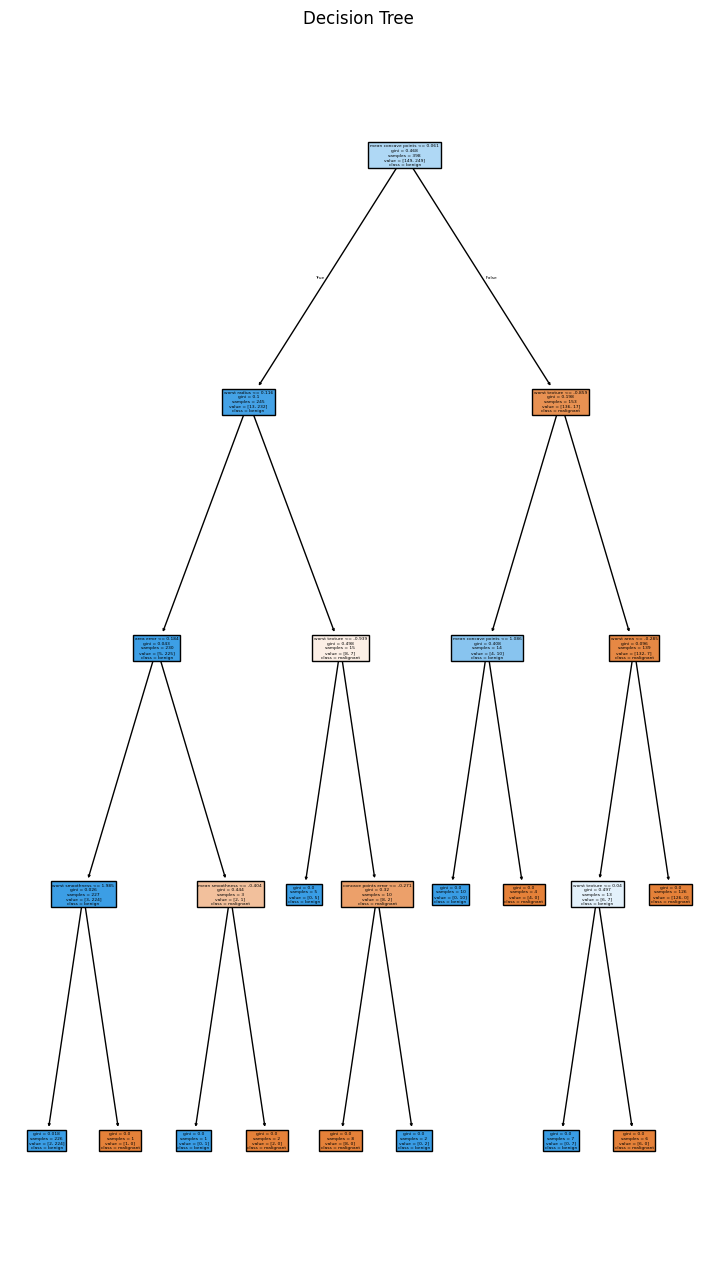

In [13]:
# ========== Code Cell for Step 10 ==========

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visuel gengivelse af beslutningstræet
plt.figure(figsize=(9, 16))  # 9:16 aspect ratio for præsentation
plot_tree(dt_model,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True)
plt.title("Decision Tree")
plt.show()


## 11. Precision, Recall, F1-score

**Formål**:
Selvom accuracy er et populært evalueringsmål, giver det ikke altid et fyldestgørende billede – især hvis klasserne er skævt fordelt. Her beregner vi derfor også:

Precision: Hvor mange af de positive forudsigelser var korrekte?

Recall: Hvor mange af de faktiske positive blev fundet?

F1-score: Harmonisk gennemsnit af precision og recall.



In [14]:
# ========== Code Cell for Step 11 ==========

from sklearn.metrics import precision_score, recall_score, f1_score

print("\nPrecision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1-score:", f1_score(y_test, dt_pred))



Precision: 0.9719626168224299
Recall: 0.9629629629629629
F1-score: 0.9674418604651163


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 12. Diskussion: Precision vs. Recall

Precision er vigtig, når falske positiver skal undgås.
Eksempel: Spam-filtrering – man vil ikke have vigtige mails markeret som spam.

Recall er vigtig, når falske negativer skal undgås.
Eksempel: Kræftscreening – man vil hellere teste for meget end overse sygdom.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 13. Cross-validation (5-fold)

**Formål**:
At evaluere beslutningstræets præstation ved hjælp af krydvalidéring (cross-validation), hvilket giver et mere pålideligt billede af modellens generaliseringsevne.

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X, y, cv=5)
print("\nCross-val scores:", scores)
print("Gennemsnitlig score:", scores.mean())



Cross-val scores: [0.92105263 0.93859649 0.93859649 0.92982456 0.90265487]
Gennemsnitlig score: 0.9261450085390468


cv=5 betyder, at datasættet opdeles i 5 fold, hvor modellen trænes på 4 og testes på 1 – og det gentages 5 gange.

Gennemsnittet af de 5 resultater viser, hvor stabil og præcis modellen er på tværs af forskellige datasplit.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## 14. Sammenlign DecisionTree og LogisticRegression

#Formål:
At evaluere og sammenligne præstationen af to klassifikationsmodeller:

LogisticRegression (lineær model)

DecisionTreeClassifier (ikke-lineær model)

In [16]:
# Beregn accuracy for begge modeller
# Beregn accuracy for begge modeller
dt_score = accuracy_score(y_test, dt_pred)
log_score = accuracy_score(y_test, y_pred)

# Sammenlign
print(f" Decision Tree Accuracy: {round(dt_score, 4)}")
print(f" Logistic Regression Accuracy: {round(log_score, 4)}")

 Decision Tree Accuracy: 0.9591
 Logistic Regression Accuracy: 0.9825


## 15. ROC-kurve og AUC-score

**Formål**:
At vurdere klassifikationsmodellens evne til at skelne mellem klasser ved hjælp af:

ROC-kurven (Receiver Operating Characteristic)

AUC (Area Under Curve)



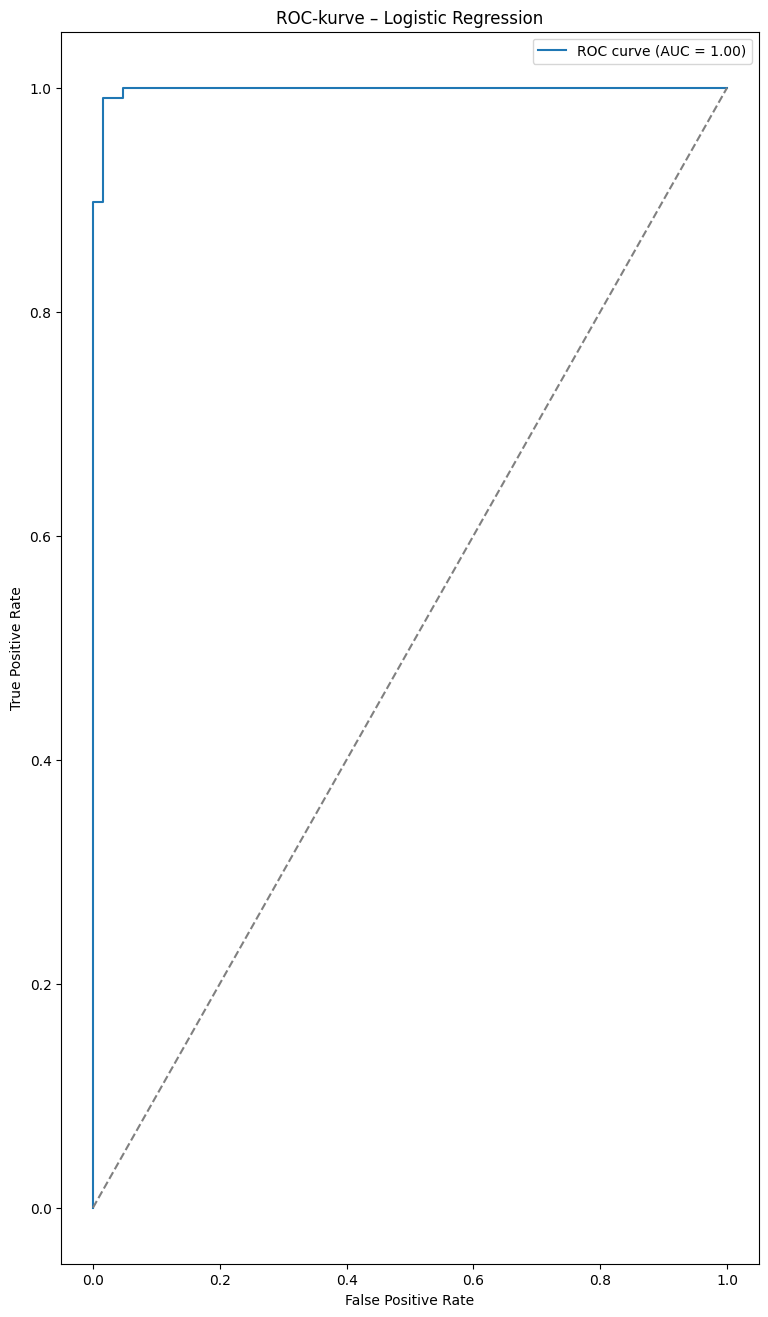

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Træn modellen på skalerede data
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Beregn sandsynligheder for positiv klasse (benign = 1)
log_probs = log_model.predict_proba(X_test)[:, 1]

# Beregn ROC og AUC
fpr, tpr, thresholds = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

# Visualiser ROC-kurve
plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-kurve – Logistic Regression")
plt.legend()
plt.show()


Hvad viser grafen?
Den blå kurve er din ROC-kurve for Logistic Regression.

Den grå stiplede linje er baseline (tilfældige gæt).

AUC-score: 1.00, hvilket betyder perfekt klassifikation.

Forklaring: 

AUC = 1.00 → modellen har skelnet perfekt mellem maligne og benigne tumorer i testdatasættet.

True Positive Rate (TPR) = hvor mange af de rigtige “positive” (maligne) tumorer modellen fandt.

False Positive Rate (FPR) = hvor mange “negative” (benigne) tumorer blev forkert klassificeret som maligne.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 16. Tre Logistic Regression modeller med forskellige penalty


In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load og forbered data
data = load_breast_cancer()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.target, test_size=0.3, random_state=42)

# Træn modeller
log_none = LogisticRegression(penalty=None, max_iter=10000)
log_none.fit(X_train, y_train)

log_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000)
log_l1.fit(X_train, y_train)

log_l2 = LogisticRegression(penalty="l2", max_iter=10000)
log_l2.fit(X_train, y_train)

# Vis i tabel
features = data.feature_names
df_none = pd.DataFrame(log_none.coef_, columns=features).T.rename(columns={0: "No Regularization"})
df_l1 = pd.DataFrame(log_l1.coef_, columns=features).T.rename(columns={0: "L1 Regularization"})
df_l2 = pd.DataFrame(log_l2.coef_, columns=features).T.rename(columns={0: "L2 Regularization"})

# Kombiner
coef_table = pd.concat([df_none, df_l1, df_l2], axis=1)
display(coef_table)



,No Regularization,L1 Regularization,L2 Regularization
mean radius,9.604359,0.000000,-0.367670
mean texture,-7.417934,0.000000,-0.368886
mean perimeter,27.504647,0.000000,-0.323265
mean area,1.732270,0.000000,-0.424750
mean smoothness,-18.873355,0.000000,-0.184647
mean compactness,186.325184,0.468417,0.595640
mean concavity,-66.998735,0.000000,-0.769889
mean concave points,-140.880146,-2.752179,-1.094419
mean symmetry,45.248791,0.021546,0.240961
mean fractal dimension,-95.123983,0.000000,0.142817


Hvad betyder de tre modeller?

| Modeltype           | Beskrivelse                                                                                      |
| ------------------- | ------------------------------------------------------------------------------------------------ |
| **Uden regulering** | Modellen lærer fuldt ud fra data uden nogen begrænsninger.                                       |
| **L1 regulering**   | Kaldes også *Lasso*. Skubber nogle koefficienter til **nul** → *feature selection*.              |
| **L2 regulering**   | Kaldes også *Ridge*. Reducerer størrelsen af alle koefficienter lidt, men fjerner ikke features. |

# Hvad ser vi i resultaterne?

Modellen uden regulering har meget store og varierende koefficientværdier (fx over 100!). Det kan være et tegn på overfitting – modellen prøver for hårdt at passe til træningsdataene.

L1-reguleret model har mange nul-koefficienter, hvilket betyder, at den ignorerer nogle features helt. Dette gør modellen enklere og mere fortolkbar.

L2-reguleret model har mindre og mere balancerede koefficienter end modellen uden regulering. Den bruger alle features, men uden at nogle får alt for stor vægt.



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 17. Visualiser vægtene for L1 og L2


In [ ]:
# ========== Code Cell for Step 17 ==========

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(log_l1.coef_[0], label="L1")
plt.plot(log_l2.coef_[0], label="L2")
plt.legend()
plt.title("Effekt af regulering (L1 vs L2)")
plt.xlabel("Feature index")
plt.ylabel("Vægt")
plt.show()


## 18. GaussianNB-model


In [ ]:
# ========== Code Cell for Step 18 ==========

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


## 19. SVC-model med lineær og rbf kerne


In [ ]:
# ========== Code Cell for Step 19 ==========

from sklearn.svm import SVC

svc_linear = SVC(kernel="linear", probability=True).fit(X_train, y_train)
svc_rbf = SVC(kernel="rbf", probability=True).fit(X_train, y_train)

print("\nSVC Linear Accuracy:", accuracy_score(y_test, svc_linear.predict(X_test)))
print("SVC RBF Accuracy:", accuracy_score(y_test, svc_rbf.predict(X_test)))


## 20. Visualisering af beslutningsgrænse (2 features)

**Formål**:
- Reducér features til 2 (for visualisering)
- Plot beslutningsgrænsen


In [ ]:
# ========== Code Cell for Step 20 ==========

import numpy as np
from mlxtend.plotting import plot_decision_regions

X_2d = X[:, [0, 1]]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=1
)

svc_2d = SVC(kernel="linear").fit(X_train_2d, y_train_2d)

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plot_decision_regions(X_test_2d, y_test_2d, clf=svc_2d, legend=2)
plt.title("Beslutningsgrænse med 2 features")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()


## 21. RandomForestClassifier


In [ ]:
# ========== Code Cell for Step 21 ==========

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))


## 22. BaggingClassifier med DecisionTree


In [ ]:
# ========== Code Cell for Step 22 ==========

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)
print("\nBagging Classifier Accuracy:", accuracy_score(y_test, bag_pred))


## 23. Learning Curves

**Formål**:
- Undersøg hvordan trænings- og test-score ændrer sig med mere data.


In [ ]:
# ========== Code Cell for Step 23 ==========

from sklearn.model_selection import learning_curve

# Decision Tree
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), X, y, cv=5)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve - Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()

# Random Forest
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=5)
plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()


## 24. Bias vs. Variance diskussion

- **Høj max_depth** => Lav bias, høj variance (overfitting).
- **Lav max_depth** => Høj bias, lav variance (underfitting).


## 25. Principal Component Analysis (PCA)

**Formål**:
- Reducere dimensionaliteten af `breast_cancer`-datasættet til 2 komponenter.
- **PCA** fremhæver de retninger i datasættet, hvor der er mest varians.


In [ ]:
# ========== Code Cell for Step 25 ==========

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Indlæs data
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 eller 1)

# Udfør PCA med 2 komponenter
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Forklaret varians pr. komponent:", pca.explained_variance_ratio_)
print("Total forklaret varians (sum):", pca.explained_variance_ratio_.sum())


## 26. Visualisér data i 2D og analyser mængden af bevaret varians

**Formål**:
- Tegn de to PCA-komponenter i et 2D-plot.
- Farvelæg punkterne baseret på, om det er malignant (0) eller benign (1).
- Se, hvor meget af den samlede varians i data, der er fanget i disse to akser.


In [ ]:
# ========== Code Cell for Step 26 ==========

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("PCA Komponent 1")
plt.ylabel("PCA Komponent 2")
plt.title("2D Visualisering af Breast Cancer Data via PCA")
plt.colorbar(label="Klasse (0 = Malignant, 1 = Benign)")
plt.show()

# Note:
# pca.explained_variance_ratio_ viser, hvor meget af datasættes varians der fanges
# i hver PCA-komponent. Summen for de første 2 komponenter ligger ofte ret højt.


## 27. Agglomerative Clustering

**Formål**:
- Udfør Agglomerative Clustering på data (2 klynger).
- Sammenlign resultaterne med de faktiske etiketter ved hjælp af en confusion matrix.

**Bemærk**:
- Clustering-metoder navngiver klynger vilkårligt, så klynge "0" betyder ikke nødvendigvis "malignant". Du kan evt. ombytte 0/1 efter fit, hvis du vil matche de sande klasser.


In [ ]:
# ========== Code Cell for Step 27 ==========

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

# Fit Agglomerative Clustering med 2 klynger
agg_model = AgglomerativeClustering(n_clusters=2)
y_agg = agg_model.fit_predict(X)

# Lav confusion matrix
cm_agg = confusion_matrix(y, y_agg)
print("Agglomerative Clustering - Confusion Matrix:\n", cm_agg)

# Alternativt kan man visualisere med et heatmap
import seaborn as sns

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
sns.heatmap(cm_agg, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Agglomerative Clustering")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()

# Bemærk: Hvis klynge 0 overvejende svarer til benign (1) og klynge 1 til malignant (0),
# kan man evt. ombytte label 0 <-> 1 i y_agg for at få "rigtige" matches i conf. matrix.


## 28. K-Means Clustering og "Elbow Method"

**Formål**:
- Anvend K-Means clustering på `breast_cancer`-datasættet.
- Bestem det optimale antal klynger via “Elbow Method”, hvor man plotter `inertia` for forskellige værdier af k.


In [ ]:
# ========== Code Cell for Step 28 ==========

from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 10)  # fx 1 til 9 klynger

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10)  # n_init=10 for gentagelse
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot "Elbow"
plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for at bestemme optimalt antal klynger")
plt.xlabel("Antal klynger (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.show()

# Typisk leder man efter knækket ('the elbow') i kurven,
# hvor inertien ikke længere falder markant ved at øge k.


Opgave 29:
Byg et multilayer neural network (MLP) på breast cancer-datasættet (fra sklearn).
Sammenlign resultatet med f.eks. Logistic Regression.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# --------------------------------------------------
# 1. Load & forbered data
# --------------------------------------------------

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# --------------------------------------------------
# 2. Model – MLP
# --------------------------------------------------

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X.shape[1], 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = MLP()

# --------------------------------------------------
# 3. Træning
# --------------------------------------------------

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# --------------------------------------------------
# 4. Evaluering
# --------------------------------------------------

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test >= 0.5).int()
    acc = accuracy_score(y_test_tensor, y_pred_labels)
    print(f"Accuracy (MLP): {acc:.2%}")


Opgave 30:
Byg et multilayer neural network (CNN) på PetFinder-billeder
Brug inspiration fra bogen (Kap. 13 + MNIST-eksempler)

In [ ]:
# ========== PetFinder CNN – PyTorch uden transfer learning ==========

import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Indstillinger
# --------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Device in use: {device}")
if device.type == 'cuda':
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("⚠️  CUDA not available. Running on CPU.")

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

IMG_DIR = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train"
CSV_PATH = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train.csv"

# --------------------------------------------------
# 2. Dataset
# --------------------------------------------------

class PetFinderDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Id"] + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row["Pawpularity"] / 100.0, dtype=torch.float32)  # regression 0–1
        return image, label

# --------------------------------------------------
# 3. Dataforberedelse
# --------------------------------------------------

df = pd.read_csv(CSV_PATH)
df = df[df["Id"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR, f + ".jpg")))]

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Tilpasset normalisering
])

train_ds = PetFinderDataset(train_df, IMG_DIR, transform)
val_ds = PetFinderDataset(val_df, IMG_DIR, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# --------------------------------------------------
# 4. Klassisk CNN-model
# --------------------------------------------------

class PetFinderCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Skaleret mellem 0–1
        )

    def forward(self, x):
        return self.model(x)

model = PetFinderCNN().to(device)

# --------------------------------------------------
# 5. Træning
# --------------------------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    train_losses.append(total_loss / len(train_loader.dataset))

    # Validering
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).unsqueeze(1)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            val_loss += loss.item() * x.size(0)
    val_losses.append(val_loss / len(val_loader.dataset))

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")

# --------------------------------------------------
# 6. Visualisering
# --------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningskurve – CNN Regression")
plt.legend()
plt.show()


Opgave 31, hvor vi bygger videre på CNN fra opgave 30 og tilføjer:

✅ BatchNorm
✅ Dropout
✅ L2 Regularisering
✅ Learning rate tuning
✅ Automatisk EarlyStopping
✅ Træningsgraf

In [ ]:
# ========== PetFinder CNN – Opgave 31 (med kapitel 13 elementer) ==========

import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Indstillinger
# --------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50

IMG_DIR = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train"
CSV_PATH = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train.csv"

# --------------------------------------------------
# 2. Dataset
# --------------------------------------------------

class PetFinderDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Id"] + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row["Pawpularity"] / 100.0, dtype=torch.float32)
        return image, label

# --------------------------------------------------
# 3. Dataforberedelse
# --------------------------------------------------

df = pd.read_csv(CSV_PATH)
df = df[df["Id"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR, f + ".jpg")))]

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_ds = PetFinderDataset(train_df, IMG_DIR, transform)
val_ds = PetFinderDataset(val_df, IMG_DIR, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# --------------------------------------------------
# 4. CNN Model med BatchNorm + Dropout
# --------------------------------------------------

class PetFinderCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = PetFinderCNN().to(device)

# --------------------------------------------------
# 5. Loss, optimizer med L2 (weight_decay), EarlyStopping setup
# --------------------------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []

# --------------------------------------------------
# 6. Træningsloop med EarlyStopping
# --------------------------------------------------

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    train_loss = total_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validering
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).unsqueeze(1)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            val_loss += loss.item() * x.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # EarlyStopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model_wts = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping activated!")
            model.load_state_dict(best_model_wts)
            break

# --------------------------------------------------
# 7. Visualisering af træning
# --------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningskurve – CNN med kapitel 13 features")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ========== PetFinder CNN – Opgave 31 (med kapitel 13 elementer) ==========

import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Indstillinger
# --------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50

IMG_DIR = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train"
CSV_PATH = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train.csv"

# --------------------------------------------------
# 2. Dataset
# --------------------------------------------------

class PetFinderDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Id"] + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row["Pawpularity"] / 100.0, dtype=torch.float32)
        return image, label

# --------------------------------------------------
# 3. Dataforberedelse
# --------------------------------------------------

df = pd.read_csv(CSV_PATH)
df = df[df["Id"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR, f + ".jpg")))]

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_ds = PetFinderDataset(train_df, IMG_DIR, transform)
val_ds = PetFinderDataset(val_df, IMG_DIR, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# --------------------------------------------------
# 4. CNN Model med BatchNorm + Dropout
# --------------------------------------------------

class PetFinderCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = PetFinderCNN().to(device)

# --------------------------------------------------
# 5. Loss, optimizer med L2 (weight_decay), EarlyStopping setup
# --------------------------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []

# --------------------------------------------------
# 6. Træningsloop med EarlyStopping
# --------------------------------------------------

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    train_loss = total_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validering
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).unsqueeze(1)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            val_loss += loss.item() * x.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # EarlyStopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model_wts = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping activated!")
            model.load_state_dict(best_model_wts)
            break

# --------------------------------------------------
# 7. Visualisering af træning
# --------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningskurve – CNN med kapitel 13 features")
plt.legend()
plt.grid(True)
plt.show()


#  Opgave 33: Kat vs Hund klassifikation med CNN (PyTorch)

I denne opgave skal vi bygge et Convolutional Neural Network (CNN) for at afgøre, om et billede indeholder en **hund** eller en **kat**. Vi bruger billederne fra `train2`-mappen og bygger modellen med **PyTorch**. bageefter vi tester 100 billeder fra en anden mappe som hedder "train"

Imports & Setup

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image


Data transform & loader

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = ImageFolder("train2", transform=transform)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

print("Klasser:", dataset.class_to_idx)  # {'cat': 0, 'dog': 1}
print("Billeder:", len(dataset))


CNN-modelen

In [ ]:
class PetCNN(nn.Module):
    def __init__(self):
        super(PetCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        return self.fc(self.conv(x))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PetCNN().to(device)


Træning

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")


In [ ]:
# Gem modellen efter træning
torch.save(model.state_dict(), "pet_model.pth")
print("✅ Modellen er gemt som pet_model.pth")


Forudsig nyt billede

In [ ]:
# Forudsig maks 100 billeder i mappen "train"
test_folder = "train"
count = 0

for filename in os.listdir(test_folder):
    if filename.endswith(".jpg"):
        path = os.path.join(test_folder, filename)
        prediction = predict_image(path, model, transform)
        print(f"{filename} ➜ {prediction}")
        count += 1
        if count >= 100:
            break


# opgave 34 vi fortsætter fra opgave 33 hvor vil bygge vidre og prøve at vis billede visualet!
Her vil vi gerne visualiseret de billeder

In [ ]:
import matplotlib.pyplot as plt
import math

def show_prediction_images(folder, model, transform, max_images=100):
    model.eval()
    count = 0
    n_cols = 5
    n_rows = math.ceil(max_images / n_cols)
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))

    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            path = os.path.join(folder, filename)
            image = Image.open(path).convert("RGB")
            transformed = transform(image).unsqueeze(0).to(device)

            with torch.no_grad():
                output = model(transformed)
                _, predicted = torch.max(output, 1)
                label = dataset.classes[predicted.item()]

            ax = fig.add_subplot(n_rows, n_cols, count + 1)
            ax.imshow(image)
            ax.set_title(f"{filename[:6]} ➜ {label}")
            ax.axis("off")

            count += 1
            if count >= max_images:
                break

    plt.tight_layout()
    plt.show()


In [ ]:
show_prediction_images("train", model, transform)


# Opgave 35: RNN-baseret Klassifikation af Patientdata
I denne opgave arbejder vi med et datasæt (bc_data.csv), der indeholder målinger fra 100 patienter. Hver patient er beskrevet med 9 værdier:

De første 8 værdier repræsenterer medicinske målinger, som alle er i intervallet 1 til 9.

Den 9. værdi er et klasselabel, hvor:

0 indikerer en rask (benign) tilstand

1 indikerer kræft (malign)

# Formål
Målet er at bygge en Recurrent Neural Network (RNN) model, som kan klassificere patienter som enten raske eller med kræft, baseret på de 8 målinger.



 1. Forbered data

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np


df = pd.read_csv("bc_data.csv")
X = df.iloc[:, :-1].values.astype(np.float32)
y = df["Label"].values.astype(np.int64)
X = X.reshape((X.shape[0], X.shape[1], 1))

class BCDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = BCDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)


2. Byg LSTM model

In [ ]:
class BCLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1):
        super(BCLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])

model = BCLSTM()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


3. Træn model

In [ ]:
for epoch in range(10):
    total_loss = 0
    for X_batch, y_batch in loader:
        output = model(X_batch)
        loss = criterion(output, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {total_loss:.4f}")


efter vi færdig med at opbygge modellen teste den
Indlæs data og del i train/test

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

df = pd.read_csv("bc_data.csv")
X = df.drop("Label", axis=1).values.astype(np.float32)
y = df["Label"].values.astype(np.int64)

X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, sequence, input)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)


LSTM-model

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])


Træning og evaluering

In [ ]:
model = RNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(30):
    model.train()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

# Evaluer
model.eval()
with torch.no_grad():
    test_pred = model(X_test_tensor)
    predicted_classes = torch.argmax(test_pred, dim=1).numpy()
    accuracy = accuracy_score(y_test, predicted_classes)

print(f"✅ Accuracy på testdata: {accuracy*100:.2f}%")


Afprøv med ny patient

In [ ]:
ny_patient = np.array([[3, 5, 4, 4, 2, 1, 6, 4]], dtype=np.float32).reshape(1, 8, 1)
ny_tensor = torch.tensor(ny_patient)
with torch.no_grad():
    output = model(ny_tensor)
    pred = torch.argmax(output, dim=1).item()

print("Ny patient:", "Kræft" if pred == 1 else "Rask")
